In [5]:
import numpy as np
import pandas as pd
#시각화 패키지
import matplotlib.pyplot as plt
#시각화에서 한글을 사용하기 위한 설정
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
#시각화에서 음수를 표현하기 위한 설정
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [6]:
# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3
# precision은 소수점은 과학적 표기법으로 변환할 자릿수를 설정
# 아래와 같이 하면 소수점 셋째 자리 밑으로는 과학적 표기법으로 표시
pd.options.display.precision = 3

In [11]:
# 분할표 사용 - 범주형과 범주형 데이터의 분포를 확인
lc_loans = pd.read_csv('./data/data/data/lc_loans.csv')
#print(lc_loans)
#grade별로 status의 개수 확인
#margin은 뷰 프로그래밍에서는 컨텐츠와 컨텐츠 사이의 여백
#통계에서의 margin은 전체에 관련된 집계 데이터를 의미(ALL)
crosstab = lc_loans.pivot_table(index='grade', columns='status', aggfunc=lambda x:len(x), margins=True)
print(crosstab)

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


In [13]:
# grade의 비율을 표시하기 위한 교차 분할 표
# 나누는 방법은 선택하면 됨
df = crosstab.copy().loc['A':'G']
df.loc[:, 'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All']/ sum(df['All'])
print(df)

status  Charged Off  Current  Fully Paid   Late    All
grade                                                 
A             0.022    0.690       0.282  0.006  0.161
B             0.040    0.709       0.235  0.016  0.294
C             0.050    0.736       0.191  0.023  0.268
D             0.067    0.717       0.184  0.031  0.165
E             0.082    0.708       0.171  0.039  0.077
F             0.118    0.654       0.180  0.047  0.029
G             0.126    0.614       0.198  0.061  0.007


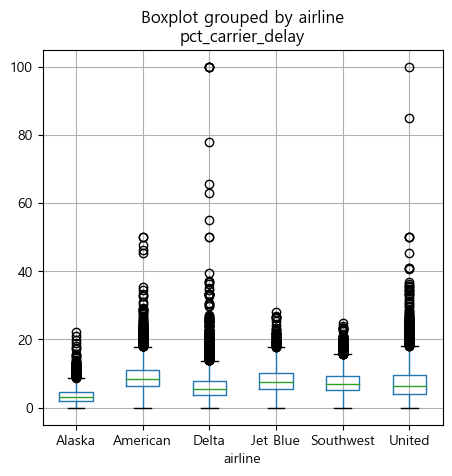

In [18]:
# 범주형과 수치형 데이터
airline_stats = pd.read_csv('./data/data/data/airline_stats.csv')
#print(airline_stats.info())
#값의 범위를 확인하기는 좋은데 분포를 파악하기는 어려움
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay', figsize=(5,5))
plt.show()

<Axes: xlabel='airline', ylabel='pct_carrier_delay'>

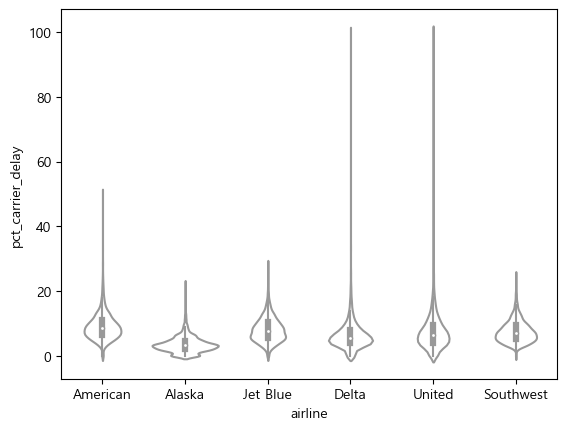

In [22]:
import seaborn as sns
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay', color='white')

In [25]:
# 병에 걸릴 확률과 병에 걸리지 않을 확률 생성
from pgmpy.factors.discrete import TabularCPD

cpd_X = TabularCPD('X', 2, [[1 - 0.002], [0.002]])
print(cpd_X)

+------+-------+
| X(0) | 0.998 |
+------+-------+
| X(1) | 0.002 |
+------+-------+


In [29]:
# 진단 시약의 판단 여부를 대입해서 확률 모형을 생성
# 정상인 경우 정상으로 판단하는게 95%, 잘 못 판단하는게 5%
# 병에 걸린 경우 병에 걸리지 않았다고 판단하는게 1%, 결렸다고 판단하는게 99%
cpd_Y_on_X = TabularCPD('Y', 2, np.array([[0.95, 0.01], [0.05, 0.99]]),evidence=['X'], evidence_card=[2])
print(cpd_Y_on_X)

# 모델 생성
from pgmpy.models import BayesianNetwork
model = BayesianNetwork([('X', 'Y')])
model.add_cpds(cpd_X, cpd_Y_on_X)
# 모델이 정상적으로 만들어 졌는지 확인 -> 결과 True로 나옴
print(model.check_model())

#양성으로 나왔을 때 확률
from pgmpy.inference import VariableElimination
#Y값이 1이면 양성으로 나왔을 때 병에 걸리지 않았을 확률과 병에 걸릴 확률
#Y값이 0이면 음성으로 나왔을 때 병에 걸리지 않았을 확률과 병에 걸릴 확률
inference = VariableElimination(model)
posterior = inference.query(['X'], evidence={'Y': 1})
print(posterior)

+------+------+------+
| X    | X(0) | X(1) |
+------+------+------+
| Y(0) | 0.95 | 0.01 |
+------+------+------+
| Y(1) | 0.05 | 0.99 |
+------+------+------+
True
+------+----------+
| X    |   phi(X) |
+======+==========+
| X(0) |   0.9618 |
+------+----------+
| X(1) |   0.0382 |
+------+----------+


In [31]:
import seaborn as sns
import scipy as sp
import scipy.stats

<function matplotlib.pyplot.show(close=None, block=None)>

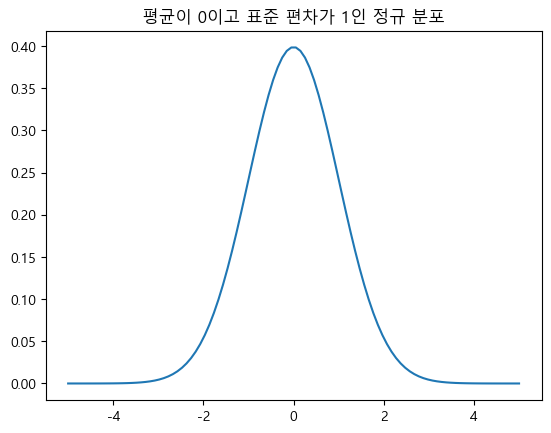

In [32]:
# 정규 분포 만들기
# 평균과 표준 편차
mu = 0 # 평균은 0
std = 1 # 표준 편차는 1
rv = sp.stats.norm(mu,std) # 정규 분포 객체 생성
xx = np.linspace(-5, 5, 100) # 샘플 데이터 100개를 생성

plt.plot(xx, rv. pdf(xx))
plt.title('평균이 0이고 표준 편차가 1인 정규 분포')
plt.show

In [34]:
x = rv.rvs(100)
print(x)

[ 1.434e+00  7.287e-01 -1.872e+00 -1.489e+00 -1.996e+00 -7.285e-01
  1.244e+00 -1.051e+00 -2.014e+00  8.196e-01 -6.528e-01  3.197e-01
  1.272e+00 -2.459e-01 -1.468e-01 -1.391e-01  8.411e-01  2.096e-01
 -1.126e-01  5.946e-01 -1.612e+00 -2.110e+00  1.095e+00 -9.950e-01
  5.118e-01  1.095e+00  2.965e-03 -6.788e-02 -1.146e+00  7.036e-01
 -4.331e-01 -3.626e-01 -4.744e-01  2.077e-01  4.451e-01 -7.309e-01
 -4.112e-01  1.092e+00 -1.881e+00 -1.083e+00 -1.005e+00  1.726e+00
 -3.893e-01 -7.531e-01  1.633e-01 -1.171e+00 -1.125e+00  8.129e-01
  2.953e-01 -6.049e-01  1.853e+00  8.169e-01 -6.460e-01  1.342e+00
  9.615e-01 -3.458e-01  6.830e-01  1.434e-03 -6.499e-01 -7.480e-01
  6.915e-01  4.164e-02  3.625e-01  4.176e-01  6.600e-01  7.541e-01
 -3.711e-01  1.718e+00  7.673e-02  1.251e+00  7.471e-02  2.287e+00
 -5.237e-01  5.951e-01 -3.155e+00 -6.666e-01 -1.199e+00  1.502e+00
  1.434e+00 -1.385e+00 -2.162e+00 -1.261e+00 -8.740e-01 -5.583e-01
 -3.436e-01 -2.086e+00  7.157e-01  2.714e-01 -1.183e+00  3.466

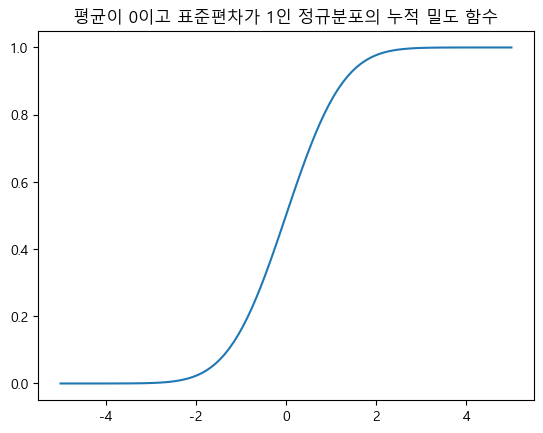

In [38]:
plt.plot(xx, rv.cdf(xx))
plt.title('평균이 0이고 표준편차가 1인 정규분포의 누적 밀도 함수')
plt.show()

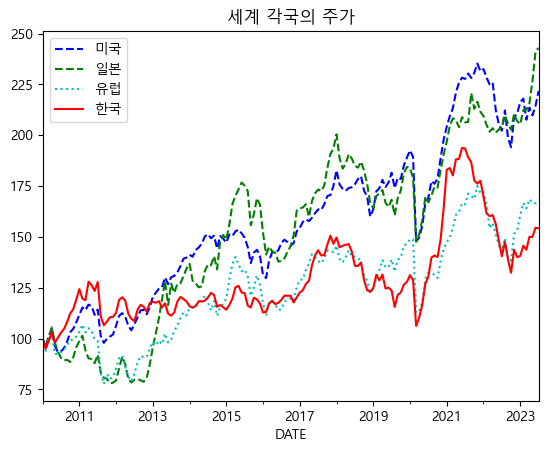

In [43]:
import pandas_datareader.data as web
import datetime

# 날짜 설정
start = datetime.datetime(2023, 1, 1)
end = datetime.datetime(2023, 8, 22)

# 가져올 국가의 주가 지수 코드
symbols=[
    'SPASTT01USM661N',
    'SPASTT01JPM661N',
    'SPASTT01EZM661N',
    'SPASTT01KRM661N'
]

data = pd.DataFrame()

for sym in symbols:
    data[sym] = web.DataReader(sym, data_source="fred", start="2010-01-01", end=end)[sym]
#print(data) 
data.columns = ['미국','일본','유럽','한국']
data = data/data.iloc[0]*100
styles = ['b--', 'g--', 'c:', 'r-']
data.plot(style=styles)
plt.title('세계 각국의 주가')
plt.show() 


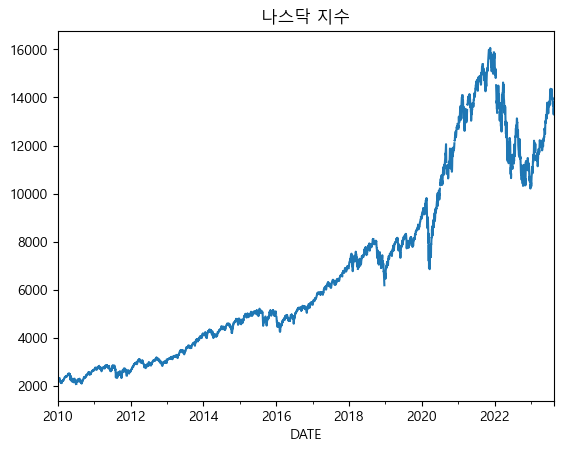

In [45]:
#나스닥 지수 그리기
data = pd.DataFrame()
symbol="NASDAQCOM"
data[symbol] = web.DataReader(symbol, data_source="fred", start="2010-01-01", end="2023-08-22")[symbol]

data.plot(legend=False)
plt.title("나스닥 지수")
plt.show() 


C:\Users\USER\AppData\Local\Temp\ipykernel_10896\3939284440.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(daily_returns, kde=False)


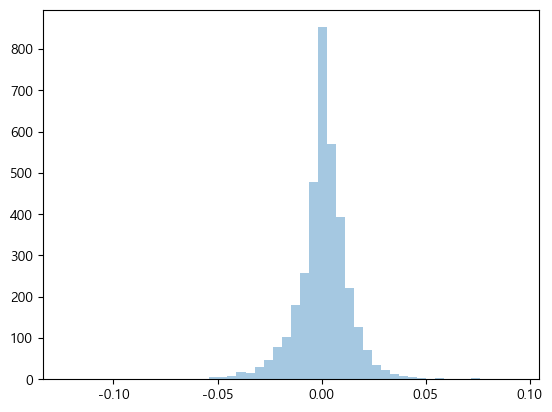

In [47]:
# 일차별 차이
daily_returns = data.pct_change().dropna()
#print(daily_returns)

# 일차별 차이를 그래프로 출력
sns.distplot(daily_returns, kde=False)
plt.show()

In [49]:
# 특정한 회사 주가 가져오기
import pandas as pd
import pandas_datareader.data as web
import yfinance as yfin

yfin.pdr_override()
samsung = web.get_data_yahoo("005930.KS")
print(samsung)

[*********************100%%**********************]  1 of 1 completed
               Open     High      Low    Close  Adj Close    Volume
Date                                                               
2000-01-04   6000.0   6110.0   5660.0   6110.0   4514.581  74195000
2000-01-05   5800.0   6060.0   5520.0   5580.0   4122.973  74680000
2000-01-06   5750.0   5780.0   5580.0   5620.0   4152.528  54390000
2000-01-07   5560.0   5670.0   5360.0   5540.0   4093.419  40305000
2000-01-10   5600.0   5770.0   5580.0   5770.0   4263.361  46880000
...             ...      ...      ...      ...        ...       ...
2023-08-17  66300.0  66800.0  66000.0  66700.0  66700.000  10778652
2023-08-18  66000.0  66700.0  65800.0  66300.0  66300.000  11745006
2023-08-21  66600.0  67100.0  66300.0  66600.0  66600.000   9720067
2023-08-22  67200.0  67700.0  66300.0  66600.0  66600.000  10500242
2023-08-23  66700.0  67100.0  66400.0  66700.0  66700.000   5345818

[5932 rows x 6 columns]


C:\Users\USER\AppData\Local\Temp\ipykernel_10896\3176506265.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, kde=False, ax=ax[0]) # 정규분포
C:\Users\USER\AppData\Local\Temp\ipykernel_10896\3176506265.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x2, kde=False, ax=ax[1]) # 로그 정규 분포


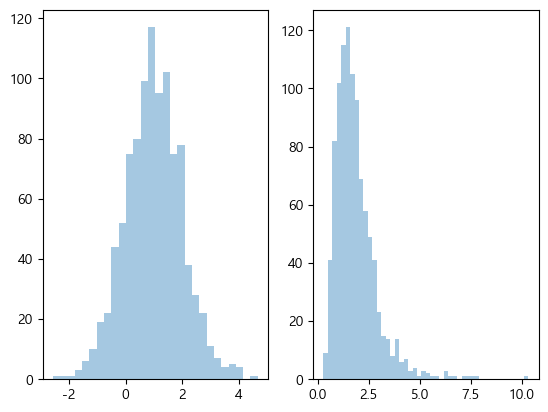

In [50]:
# 정규 분포와 로그 정규분포
mu = 1
rv = sp.stats.norm(loc=mu)

x1 = rv.rvs(1000)
s = 0.5
x2 = np.exp(s * x1)

fig, ax = plt.subplots(1, 2)
sns.distplot(x1, kde=False, ax=ax[0]) # 정규분포
sns.distplot(x2, kde=False, ax=ax[1]) # 로그 정규 분포
plt.show()



[ 5  4  3  1  5  4  4  3  3  3  2  6  3  6  4  3  4  2  4  3  4  4  4  2
  2  5  0  6  1  8  2  3  2  5  1  5  7  1  5  4  0  5  4  1  2  2  5  4
  5  1  3  3  3  1  3  3  4  4  4  1  4  3  5  1  4  4  4  4  3  4  4  3
  5  2  2  2  3  1  4  4  0  3  2 10  5  3  4  6  4  3  3  3  2  6  1  3
  5  2  1  0  1  6  1  5  0  5  2  4  4  0  6  4  4  1  2  8  4  3  2  3
  3  2  7  2  6  2  3  4  1  1  3  1  5  3  6  2  2  4  2  2  3  3  2  3
  6  3  2  4  4  4  2  2  8  2  5  1  1  2  4  1  7  3  0  1  8  2  2  1
  0  3  2  0  4  4  4  5  3  2  1  4  4  3  3  4  1  2  1  3  1  5  6  0
  4  2  3  1  3  3  6  1  2  6  2  2  5  4  5  3  3  3  2  4  3  2  8  5
  3  5  1  4  3  6  7  1  6  3  3  3  2  3  1  4  2  4  2  4  2  4  4  2
  1  1  2  5  3  2  3  2  3  5  5  4  3  2  1  3  3  2  2  4  2  3  4  3
  7  5  1  2  6  4  1  3  2  5  3  2  2  1  0  2  6  2  2  3  4  3  1  2
  3  3  5  7  4  4  5  3  2  4  5  3  3  5  4  1  3  2  3  5  4  3  2  3
  2  2  4  6  4  6  1  7  3  0  2  2  1  5  2  2  1

C:\Users\USER\AppData\Local\Temp\ipykernel_10896\2511776829.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_poisson,


[Text(0.5, 0, '푸아송 분포'), Text(0, 0.5, '빈도 수')]

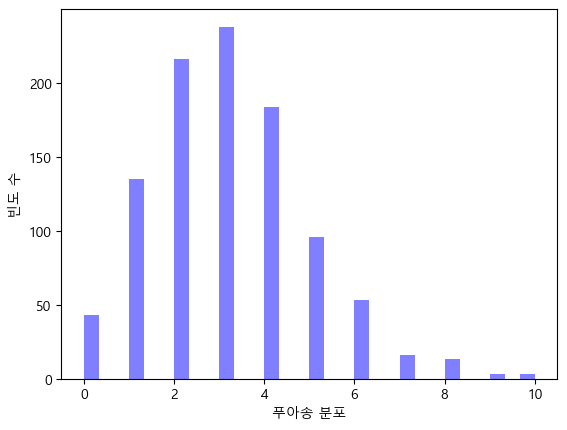

In [52]:
# 포아송 분포
data_poisson = sp.stats.poisson.rvs(mu=3, size=1000)
print(data_poisson)
ax = sns.distplot(data_poisson,
                 bins=30,
                 color='blue',
                 kde=False,
                 hist_kws={'linewidth':1, 'alpha':0.5})
ax.set(xlabel='푸아송 분포', ylabel='빈도 수')

In [54]:
import random
# 데이터 집단
li = [10,20,30,40,50]

# 복원 추출
# randint (시작위치, 종료위치) -> 특정 범위 내의 정수를 리턴
for i in range(5):
    print(li[random.randint(0, len(li)-1)], end=' ')
    
# 비복원 추출
result = random.sample(li, k=5)
print(result)


50 40 20 20 40 [50, 20, 30, 40, 10]


In [60]:
ar = ["오미크론", "다크스펙터", "나즈", "라투", "위치"]
# 복원 추출
print(np.random.choice(ar,5))
# 8:2 비복원 추출 - 일반적인 머신러닝에서 훈련 데이터와 검증 데이터 분리
sample = np.random.choice(ar,int(len(ar) * 0.8), replace=False)
print(sample)
validation=[]
#데이터를 순회하면서 속하지 않은 데이터만 validation 에 추가
for i in ar :
    if i not in sample :
        validation.append(i)
print(validation)


['오미크론' '라투' '라투' '라투' '나즈']
['위치' '오미크론' '라투' '나즈']
['다크스펙터']


In [61]:
print(np.random.choice(ar,5, p=[0.1,0.1,0.2,0.2,0.4]))


['오미크론' '라투' '라투' '나즈' '나즈']


In [62]:
help(pd.Series.sample)

Help on function sample in module pandas.core.generic:

sample(self: 'NDFrameT', n: 'int | None' = None, frac: 'float | None' = None, replace: 'bool_t' = False, weights=None, random_state: 'RandomState | None' = None, axis: 'Axis | None' = None, ignore_index: 'bool_t' = False) -> 'NDFrameT'
    Return a random sample of items from an axis of object.
    
    You can use `random_state` for reproducibility.
    
    Parameters
    ----------
    n : int, optional
        Number of items from axis to return. Cannot be used with `frac`.
        Default = 1 if `frac` = None.
    frac : float, optional
        Fraction of axis items to return. Cannot be used with `n`.
    replace : bool, default False
        Allow or disallow sampling of the same row more than once.
    weights : str or ndarray-like, optional
        Default 'None' results in equal probability weighting.
        If passed a Series, will align with target object on index. Index
        values in weights not found in sampled 

In [69]:
# DataFrame에서의 샘플링
ex_df = pd.DataFrame(np.arange(0,120).reshape(40,3))
#print(ex_df)
#print(ex_df.sample())

# 10개 데이터 샘플링
#print(ex_df.sample(10))

print(ex_df.sample(frac=0.8))

      0    1    2
8    24   25   26
0     0    1    2
2     6    7    8
31   93   94   95
3     9   10   11
16   48   49   50
4    12   13   14
38  114  115  116
32   96   97   98
13   39   40   41
23   69   70   71
10   30   31   32
20   60   61   62
36  108  109  110
22   66   67   68
12   36   37   38
1     3    4    5
24   72   73   74
39  117  118  119
5    15   16   17
35  105  106  107
18   54   55   56
9    27   28   29
17   51   52   53
14   42   43   44
30   90   91   92
37  111  112  113
6    18   19   20
15   45   46   47
21   63   64   65
26   78   79   80
19   57   58   59


In [72]:
X = np.arange(20).reshape(10,2)
print(X)

y = np.arange(10)
print(y)


[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]]
[0 1 2 3 4 5 6 7 8 9]


In [74]:
#순차적 분할 - 데이터를 순서대로 분할 : shuffle 옵션을 False로 설정
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    shuffle=False, 
                                                    random_state=42)
print(X_train)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]]
X_train shape: (7, 2)
X_test shape: (3, 2)
y_train shape: (7,)
y_test shape: (3,)


In [76]:
# 랜덤 추출
# 랜덤 추출을 할 때 이를 가지고 실제 훈련에 사용한다면 시드는 고정을 시켜야 함
# 시드를 고정시키지 않으면 선택된 데이터에 따라 다른 모델이 만들어지고
# 검증해야 하는 데이터도 랜덤하게 생성되므로 평가지표가 매번 달라지게 됨

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    random_state=42)
print(X_train)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

[[ 0  1]
 [14 15]
 [ 4  5]
 [18 19]
 [ 8  9]
 [ 6  7]
 [12 13]]
X_train shape: (7, 2)
X_test shape: (3, 2)
y_train shape: (7,)
y_test shape: (3,)


In [77]:
X = np.arange(30).reshape(15,2)
print(X)

y = np.arange(15)
print(y)

grep = [0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]


[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]
 [20 21]
 [22 23]
 [24 25]
 [26 27]
 [28 29]]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [78]:

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    stratify=grep,
                                                    random_state=42)

print(X_train)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

[[ 2  3]
 [14 15]
 [26 27]
 [16 17]
 [ 8  9]
 [28 29]
 [10 11]
 [ 4  5]
 [12 13]
 [20 21]]
X_train shape: (10, 2)
X_test shape: (5, 2)
y_train shape: (10,)
y_test shape: (5,)


In [80]:
# 시드 고정
np.random.seed(42)
# 데이터 불러오기
df = pd.read_csv('./data/data/data/coffee_dataset.csv')
print(df.head())
# 실제 데이터 개수
df.info()

   user_id   age  drinks_coffee  height
0     4509   <21          False  64.538
1     1864  >=21           True  65.824
2     2060   <21          False  71.320
3     7875  >=21           True  68.569
4     6254   <21           True  64.020
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974 entries, 0 to 2973
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2974 non-null   int64  
 1   age            2974 non-null   object 
 2   drinks_coffee  2974 non-null   bool   
 3   height         2974 non-null   float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 72.7+ KB


In [82]:
# 200개의 데이터 샘플링
df_sample = df.sample(200)
df_sample.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 2402 to 1422
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        200 non-null    int64  
 1   age            200 non-null    object 
 2   drinks_coffee  200 non-null    bool   
 3   height         200 non-null    float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 6.4+ KB


In [85]:
# 커피를 마시는 사람과 커피를 마시지 않은 사람의 키 평균 차이
# 반복 횟수
iterationNum = 10000
diffHeightList = []
for _ in range(iterationNum):
    bootSample = df_sample.sample(200, replace=True) # 복원 추출
    # 커피를 마시지 않는 사람 평균 키
    nonCoffeeHeightMean = bootSample[bootSample['drinks_coffee'] == False].height.mean()
    # 커피를 마시는 사람 평균 키
    coffeeHeightMean = bootSample[bootSample['drinks_coffee'] == True].height.mean()
    # 차이 구하기
    diff = nonCoffeeHeightMean - coffeeHeightMean
    # 리스트에 추가
    diffHeightList.append(diff)
# print(len(diffHeightList))
# 신뢰수준 99.5% 인 평균 키 차이에 대한 신뢰구간
print(np.percentile(diffHeightList, 0.5), np.percentile(diffHeightList, 99.5))
    

-2.516490937129597 -0.0902771292963689


In [86]:
# 21세 이상의 사람과 21세 미만의 키 평균 차이
diffHeightListByAge = []
for _ in range(iterationNum):
    bootSample = df_sample.sample(200, replace=True) # 복원 추출
    over21HeightMean = bootSample[bootSample['age'] == '>=21'].height.mean() # 21살 이상 평균 키
    under21HeightMean = bootSample[bootSample['age'] == '<21'].height.mean() # 21살 미만 평균 키
    diff = over21HeightMean - under21HeightMean
    diffHeightListByAge.append(diff)
    
print(np.percentile(diffHeightListByAge, 0.5), np.percentile(diffHeightListByAge, 99.5))

3.366711378170767 5.132127656262199


In [ ]:
import scipy as sp
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power